!pip install nibabel

In [28]:
import glob
import os, sys
import nibabel as nib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
task1_rawdata_path = 'C:/Users/parkm/Desktop/github/miccai_stroke_2022/01.data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/rawdata'

In [3]:
task1_derivatives_path = 'C:/Users/parkm/Desktop/github/miccai_stroke_2022/01.data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/derivatives'

In [103]:
glob.glob(r'C:/Users/parkm/Desktop/github/miccai_stroke_2022/01.data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/derivatives/**/*.nii.gz', recursive=True)

['C:/Users/parkm/Desktop/github/miccai_stroke_2022/01.data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/derivatives\\sub-strokecase0003\\ses-0001\\sub-strokecase0003_ses-0001_msk.nii.gz',
 'C:/Users/parkm/Desktop/github/miccai_stroke_2022/01.data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/derivatives\\sub-strokecase0005\\ses-0001\\sub-strokecase0005_ses-0001_msk.nii.gz',
 'C:/Users/parkm/Desktop/github/miccai_stroke_2022/01.data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/derivatives\\sub-strokecase0010\\ses-0001\\sub-strokecase0010_ses-0001_msk.nii.gz',
 'C:/Users/parkm/Desktop/github/miccai_stroke_2022/01.data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/derivatives\\sub-strokecase0013\\ses-0001\\sub-strokecase0013_ses-0001_msk.nii.gz',
 'C:/Users/parkm/Desktop/github/miccai_stroke_2022/01.data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/derivatives\\sub-strokecase00

In [4]:
task1_derivatives_folders = [x+'/ses-0001/*.nii.gz' for x in glob.glob(task1_derivatives_path+'/*')]

In [5]:
task1_rawdata_folders = [x+'/ses-0001/*.nii.gz' for x in glob.glob(task1_rawdata_path+'/*')]

In [6]:
task1_rawdata_folders[0]

'C:/Users/parkm/Desktop/github/miccai_stroke_2022/01.data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/rawdata\\sub-strokecase0002/ses-0001/*.nii.gz'

In [8]:
task1_derivatives_folders[0]

'C:/Users/parkm/Desktop/github/miccai_stroke_2022/01.data/task1.stroke_segmentation/dataset-ISLES22^release1 unzipped version/derivatives\\sub-strokecase0003/ses-0001/*.nii.gz'

In [9]:
task1_rawdata_folders_nifti = glob.glob(task1_rawdata_folders[1])

In [10]:
# img 객체에 nii.gz 파일 경로 입력해서 열기
img = nib.load(task1_rawdata_folders_nifti[0])

In [11]:
# shape 확인하기
img.shape

(112, 112, 72)

In [12]:
# dtype 확인하기
img.get_data_dtype()

dtype('<f8')

In [13]:
# 이미지의 affine metrix 확인하기
img.affine.shape

(4, 4)

In [14]:
img.affine

array([[-1.99384665e+00,  3.16470414e-02, -1.53538913e-01,
         1.22663658e+02],
       [ 7.92258307e-02,  1.89368439e+00, -6.38500273e-01,
        -9.00652237e+01],
       [-1.35273814e-01,  6.42617941e-01,  1.88911176e+00,
        -8.15926666e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [15]:
# nifti 이미지 헤더 확인하기
hdr = img.header

In [16]:
hdr_dict = dict()

In [17]:
hdr_dict['file1'] = hdr

In [18]:
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 112 112  72   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.014056727
quatern_c       : 0.98594135
quatern_d       : 0.16242322
qoffset_x       : 122.66366
qoffset_y       : -90.06522
qoffset_z       : -81.59267
srow_x

In [19]:
# x,y,z unit 확인하기
hdr.get_xyzt_units()[0]

'mm'

In [20]:
hdr.get_xyzt_units()[1]

'unknown'

In [21]:
# raw 헤더정보 액세스하기(고급 옵션)
raw = hdr.structarr

In [22]:
raw

array((348, b'', b'', 0, 0, b'r', 0, [  3, 112, 112,  72,   1,   1,   1,   1], 0., 0., 0., 0, 64, 64, 0, [-1.,  2.,  2.,  2.,  0.,  0.,  0.,  0.], 0., nan, nan, 0, 0, 2, 0., 0., 0., 0., 0, 0, b'', b'', 2, 1, 0.01405673, 0.98594135, 0.16242322, 122.66366, -90.06522, -81.59267, [-1.9938467e+00,  3.1647041e-02, -1.5353891e-01,  1.2266366e+02], [ 7.9225831e-02,  1.8936844e+00, -6.3850027e-01, -9.0065224e+01], [ -0.13527381,   0.64261794,   1.8891118 , -81.59267   ], b'', b'n+1'),
      dtype=[('sizeof_hdr', '<i4'), ('data_type', 'S10'), ('db_name', 'S18'), ('extents', '<i4'), ('session_error', '<i2'), ('regular', 'S1'), ('dim_info', 'u1'), ('dim', '<i2', (8,)), ('intent_p1', '<f4'), ('intent_p2', '<f4'), ('intent_p3', '<f4'), ('intent_code', '<i2'), ('datatype', '<i2'), ('bitpix', '<i2'), ('slice_start', '<i2'), ('pixdim', '<f4', (8,)), ('vox_offset', '<f4'), ('scl_slope', '<f4'), ('scl_inter', '<f4'), ('slice_end', '<i2'), ('slice_code', 'u1'), ('xyzt_units', 'u1'), ('cal_max', '<f4'), ('

In [23]:
# data에 nii.gz 파일 array로 담기
data = img.get_fdata()

In [24]:
# get_fdata의 shape 확인하기
data.shape

(112, 112, 72)

In [62]:

data.shape[1]/2

56.0

In [64]:
layer_numb_list = []

In [73]:
[int((data.shape[1]/2+20)-5*i) for i in range(9)]

[76, 71, 66, 61, 56, 51, 46, 41, 36]

In [25]:
data.shape[2]

72

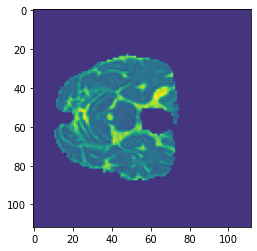

In [29]:
plt.imshow(data[:,:,20])

In [97]:
def save_nifti_images(input_nifti_path, axis, layer_numb_list, interval, save_path):
    
    img = nib.load(task1_rawdata_folders_nifti[0])
    fig, axs = plt.subplots(3, 3, figsize=(10,10))
    
    if layer_numb_list==None:
        layer_numb_list = [int((data.shape[axis]/2+(interval*4))-interval*i) for i in range(9)]
        
        for ax, layer_numb in zip(axs.ravel(), layer_numb_list):
            if axis==2:
                sample = data[:,:,layer_numb]
            elif axis==1:
                sample = data[:,layer_numb,:]
            elif axis==0:
                sample = data[layer_numb,:,:]
            ax.imshow(sample, cmap='gray')
            
    else:
        for ax, layer_numb in zip(axs.ravel(), layer_numb_list):
            if axis==2:
                sample = data[:,:,layer_numb]
            elif axis==1:
                sample = data[:,layer_numb,:]
            elif axis==0:
                sample = data[layer_numb,:,:]
            ax.imshow(sample, cmap='gray')
    
    plt.savefig(save_path+'.png', dpi=300)

In [86]:
data.shape

(112, 112, 72)

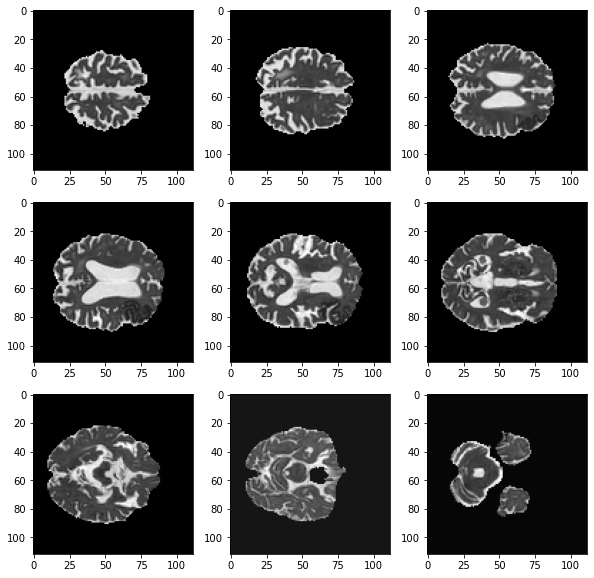

In [99]:
save_nifti_images(task1_rawdata_folders_nifti[0], 2, None, 5, 'C:/Users/parkm/Desktop/github/miccai_stroke_2022/result/')